## Optimal Savings with Stochastic Financial Returns

#### John Stachurski 

Prepared for the fall semester 2018.

Thanks to Natasha Watkins for help putting this together.

In [4]:
import numpy as np
from numba import njit, prange
import quantecon as qe
import matplotlib.pyplot as plt

The code below solves for the optimal savings and consumption rates by first obtaining the fixed point of the operator

$$ Sg(z) = \left\{ 1 + (Kg(z))^{1/\gamma} \right\}^\gamma $$

In [5]:
z_size = 20  # size of state space

In [6]:
class OptimalSavings:
    
    def __init__(self,
                 γ=4,
                 β=np.linspace(0.9, 0.96, z_size),
                 R=np.linspace(1.05, 1.15, z_size),
                 mc=qe.tauchen(0.95, 0.1, n=z_size)):

        self.γ = γ
        self.β = β
        self.R = R
        self.mc = mc
        
        Π = self.mc.P
        self.K = β * R**(1 - γ) * Π

        r_K = max(abs(np.linalg.eigvals(self.K)))
        print(f'Spectral radius is {r_K}\n')

        if r_K >= 1:
            raise ValueError('Spectral radius not less than one')

In [7]:
def S_factory(op):
    """
    Here `op` is an instance of OptimalSavings
    
    """
    γ = op.γ
    K = op.K
    
    @njit
    def S(g):
        return (1 + (K @ g)**(1 / γ))**γ
    
    return S

In [8]:
def solve_model(op,
                use_parallel=True,
                tol=1e-4,
                max_iter=1000,
                verbose=True,
                print_skip=25):
    
    S = S_factory(op)

    # Set up loop
    i = 0
    error = tol + 1

    # Initialize g
    g = np.ones(z_size)

    while i < max_iter and error > tol:
        g_new = S(g)
        error = np.max(np.abs(g - g_new))
        i += 1
        if verbose and i % print_skip == 0:
            print(f"Error at iteration {i} is {error}.")
        g[:] = g_new

    if i == max_iter:
        print("Failed to converge!")

    if verbose and i < max_iter:
        print(f"\nConverged in {i} iterations.")

    return g_new

Let's solve the model and see in particular how the parameters affect the state contingent savings rate, which is

$$ 1 - g^*(z)^{-1/\gamma} $$

In [9]:
op_1 = OptimalSavings()
op_2 = OptimalSavings(β=op_1.β * 0.9)

g_star_1 = solve_model(op_1)
g_star_2 = solve_model(op_2)

Spectral radius is 0.7154363875415961

Spectral radius is 0.6438927487874369

Error at iteration 25 is 1104.584903146846.
Error at iteration 50 is 202.83508007034834.
Error at iteration 75 is 25.58057464905869.
Error at iteration 100 is 3.072077351695043.
Error at iteration 125 is 0.36624615878099576.
Error at iteration 150 is 0.04360801046277629.
Error at iteration 175 is 0.005190996147575788.
Error at iteration 200 is 0.0006178897165227681.

Converged in 222 iterations.
Error at iteration 25 is 306.38461814922994.
Error at iteration 50 is 24.311201606284158.
Error at iteration 75 is 1.5277156051452039.
Error at iteration 100 is 0.09380224678534432.
Error at iteration 125 is 0.005738016423492809.
Error at iteration 150 is 0.0003507113378873328.

Converged in 162 iterations.


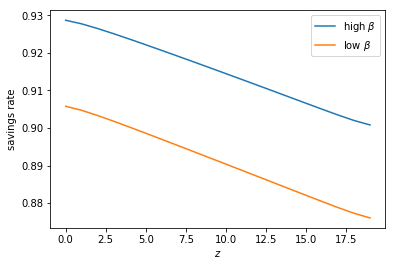

In [10]:
fig, ax = plt.subplots()

ax.plot(range(z_size), (1 - (g_star_1)**(-1/op_1.γ)), 
        label="high $\\beta$")
ax.plot(range(z_size), (1 - (g_star_2)**(-1/op_2.γ)), 
        label="low $\\beta$")

ax.set_xlabel("$z$")
ax.set_ylabel("savings rate")

ax.legend()
plt.show()

Now let's try with the interest rate.

In [11]:
op_1 = OptimalSavings()
op_2 = OptimalSavings(R=op_1.R * 0.95)

g_star_1 = solve_model(op_1)
g_star_2 = solve_model(op_2)

Spectral radius is 0.7154363875415961

Spectral radius is 0.8344497886474358

Error at iteration 25 is 1104.584903146846.
Error at iteration 50 is 202.83508007034834.
Error at iteration 75 is 25.58057464905869.
Error at iteration 100 is 3.072077351695043.
Error at iteration 125 is 0.36624615878099576.
Error at iteration 150 is 0.04360801046277629.
Error at iteration 175 is 0.005190996147575788.
Error at iteration 200 is 0.0006178897165227681.

Converged in 222 iterations.
Error at iteration 25 is 8527.396701902107.
Error at iteration 50 is 6967.974429636553.
Error at iteration 75 is 2840.624110790435.
Error at iteration 100 is 969.6588715630933.
Error at iteration 125 is 314.1662402781076.
Error at iteration 150 is 100.17206293356139.
Error at iteration 175 is 31.78101348137716.
Error at iteration 200 is 10.067230146320071.
Error at iteration 225 is 3.1874166965135373.
Error at iteration 250 is 1.009021653328091.
Error at iteration 275 is 0.31940443464554846.
Error at iteration 300 is 

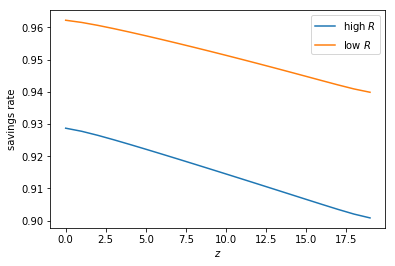

In [12]:
fig, ax = plt.subplots()

ax.plot(range(z_size), (1 - (g_star_1)**(-1/op_1.γ)), 
        label="high $R$")
ax.plot(range(z_size), (1 - (g_star_2)**(-1/op_2.γ)), 
        label="low $R$")

ax.set_xlabel("$z$")
ax.set_ylabel("savings rate")

ax.legend()
plt.show()

Now let's see what happens in the last exercise if $\gamma$ is a smaller number.

In [13]:
op_1 = OptimalSavings(γ=0.5)
op_2 = OptimalSavings(R=op_1.R * 0.95, γ=0.5)

g_star_1 = solve_model(op_1)
g_star_2 = solve_model(op_2)

Spectral radius is 0.9817880675015813

Spectral radius is 0.9569286384125347

Error at iteration 25 is 0.10939053068125215.
Error at iteration 50 is 0.044445013716073234.
Error at iteration 75 is 0.017980448973453633.
Error at iteration 100 is 0.007362855078422825.
Error at iteration 125 is 0.003043374285336853.
Error at iteration 150 is 0.0012642687681339027.
Error at iteration 175 is 0.0005264397738962145.
Error at iteration 200 is 0.00021943908838295556.

Converged in 223 iterations.
Error at iteration 25 is 0.040711350108816546.
Error at iteration 50 is 0.005589487898059353.
Error at iteration 75 is 0.0007084105533428087.

Converged in 99 iterations.


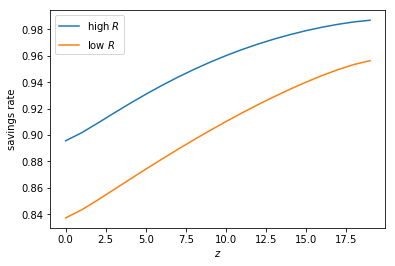

In [14]:
fig, ax = plt.subplots()

ax.plot(range(z_size), (1 - (g_star_1)**(-1/op_1.γ)), 
        label="high $R$")
ax.plot(range(z_size), (1 - (g_star_2)**(-1/op_2.γ)), 
        label="low $R$")

ax.set_xlabel("$z$")
ax.set_ylabel("savings rate")


ax.legend()
plt.show()